# <center> ML-8. Продвинутые методы машинного обучения
---

### 2. Ансамблирование: бэггинг, случайный лес

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


# Загрузим датасет из библиотеки
data = load_diabetes(as_frame=True)
# Создаем матрицу наблюдений
X = data['frame'].drop('target', axis=1)
# Создаем вектор правильных ответов
y = data['target']
 
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: >

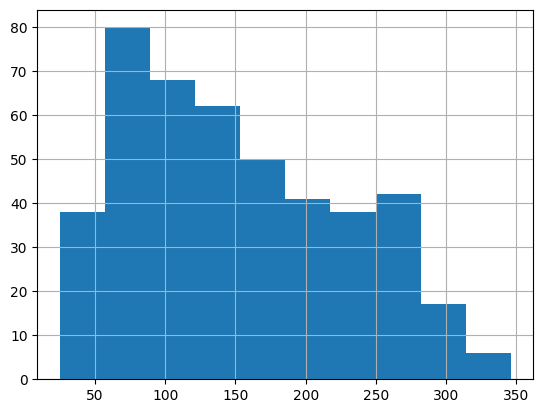

In [2]:
# Посмотрим на распределение целевого признака
y.hist()

In [3]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)


# Посмотрим на размерности выборок
print(f'Размерность обучающей выборки {X_train.shape}')
print(f'Размерность тестовой выборки {X_test.shape}')
# Будет выведено:
# Размерность обучающей выборки (296, 10)
# Размерность тестовой выборки (146, 10)


# Создаем модель дерева решений с максимальной глубиной 10
regr1 = DecisionTreeRegressor(
    max_depth=10, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr1.fit(X_train, y_train)


 
# Создаем модель случайного леса из 10 деревьев с максимальной глубиной 10 для каждого дерева
regr2 = RandomForestRegressor(
    max_depth=10, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)
# Обучаем модель
regr2.fit(X_train, y_train)


# Формируем предсказания каждой из моделей
y_pred1 = regr1.predict(X_test)
y_pred2 = regr2.predict(X_test)
 
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1), 2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred2), 2)}')


# Будет выведено:
# Качество предсказания по MSE для решающего дерева 6132.51
# Качество предсказания по MSE для случайного леса  3548.31

Размерность обучающей выборки (296, 10)
Размерность тестовой выборки (146, 10)
Качество предсказания по MSE для решающего дерева 6132.51
Качество предсказания по MSE для случайного леса 3533.73


In [4]:
# Задание 2.6
# Одним из самых важных параметров, который непосредственно отвечает за переобучение и недообучение в деревьях, является глубина дерева. 
# Предлагается используя код из модуля попытаться добиться недообучения для решающего дерева и случайного леса. Для этого:
# Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 2.
# В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.
regr1_u = DecisionTreeRegressor(
    max_depth=2,
    random_state=42
)
regr1_u.fit(X_train, y_train)

regr2_u = RandomForestRegressor(
    max_depth=2, 
    n_estimators=10,
    random_state=42 
)
regr2_u.fit(X_train, y_train)

y_pred1_u = regr1_u.predict(X_test)
y_pred2_u = regr2_u.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1_u), 2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred2_u), 2)}')

Качество предсказания по MSE для решающего дерева 3432.45
Качество предсказания по MSE для случайного леса 3203.77


In [5]:
# Задание 2.7
# Известно, что при большой глубине деревья склонны к переобучению. 
# В данном задании предлагается, используя код и прошлого задания, попытаться искусственно добиться переобучения модели решающего дерева и случайного леса.
# Используя код из модуля, поставьте глубину деревьев в решающем дереве и случайном лесу, равную 1000.
# В качестве ответа приведите MSE решающего дерева и случайного леса (по модулю), округлённую до второго знака после запятой.
regr1_o = DecisionTreeRegressor(
    max_depth=1000,
    random_state=42
)
regr1_o.fit(X_train, y_train)

regr2_o = RandomForestRegressor(
    max_depth=1000, 
    n_estimators=10,
    random_state=42 
)
regr2_o.fit(X_train, y_train)

y_pred1_o = regr1_o.predict(X_test)
y_pred2_o = regr2_o.predict(X_test)
 
print(f'Качество предсказания по MSE для решающего дерева {round(mean_squared_error(y_test, y_pred1_o), 2)}')
print(f'Качество предсказания по MSE для случайного леса {round(mean_squared_error(y_test, y_pred2_o), 2)}')

Качество предсказания по MSE для решающего дерева 6430.63
Качество предсказания по MSE для случайного леса 3549.09


---
### 3. Ансамблирование: блендинг и стекинг

СТЕКИНГ В SKLEARN

In [6]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

Основные параметры *StackingRegressor*:

`estimators` — список из кортежей базовых моделей в виде (*str*, *model*). Первым элементом в каждом кортеже идет строка с именем модели, вторым — собственно сама модель.

`final_estimator` — метамодель.

`cv` — количество фолдов, на которые делится выборка. По умолчанию используется пять фолдов.

In [7]:
#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

In [8]:
# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле                    
        random_state=42 #датчик генератора случайных чисел
    )
)
# Обучаем модель
reg.fit(X_train, y_train)

StackingRegressor(estimators=[('lr', RidgeCV()),
                              ('dt', DecisionTreeRegressor(random_state=42))],
                  final_estimator=RandomForestRegressor(n_estimators=10,
                                                        random_state=42))

In [9]:
# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

# Будет выведено:
# Качество предсказания по MSE для стекинга 3464.11

Качество предсказания по MSE для стекинга 3467.74


In [10]:
# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,152.477333,154.0
1,202.022338,192.0
2,133.718464,116.0
3,146.698345,81.0
4,169.783292,122.0


In [11]:
# Задание 3.5
# Для выполнения задания используйте набор данных о диабете, который представлен в ноутбуке с примерами.
# Постройте стекинг из следующих базовых моделей:
# Ридж-регрессия (RidgeCV());
# Линейная регрессия.
# В качестве метамодели используйте случайный лес с количеством деревьев 100, максимальной глубиной 10, все параметры для базовых моделей стандартные. 
# Для всех алгоритмов параметр random_state=42.
# Сделайте предсказание целевой метки для тестового набора данных. 
# Рассчитайте метрику MSE для набора данных и запишите её в качестве ответа с точностью до одного знака после запятой.
from sklearn.linear_model import LinearRegression

estimators = [
    ('rr', RidgeCV()),
    ('lr',  LinearRegression())]

reg_2 = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))

reg_2.fit(X_train, y_train)

y_pred_stack_2 = reg_2.predict(X_test)
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack_2), 1)}')

Качество предсказания по MSE для стекинга 3534.7


---
### 4. Ансамблирование: бустинг

АДАПТИВНЫЙ БУСТИНГ В SKLEARN

`estimator` — параметр отвечает за природу базовых моделей, по умолчанию это *DecisionTreeRegressor* c максимальной глубиной (*max_depth*) 3.

`n_estimators` — максимальное количество базовых моделей, по умолчанию равно 50. В случае идеального обучения алгоритм завершается ранее, чем данное значение.

`learning_rate` — темп обучения, параметр, добавляющий дополнительный множитель весу базовой модели, по умолчанию он равен 1.

`loss{'linear', 'square', 'exponential'}` — функция ошибки для обновления весов (в теоретической части мы рассматривали экспоненциальную форму обновления весов — '*exponential*')

`random_state` — параметр, фиксирующий случайные процессы в модели.

In [12]:
from sklearn.ensemble import AdaBoostRegressor

# Создаем объект класса дерева решений
dt = DecisionTreeRegressor(
    max_depth=3, #максимальная глубина дерева
    random_state=42 #датчик генератора случайных чисел
)
# Создаем объект класса AdaBoost
ada = AdaBoostRegressor(
    estimator=dt, #базовая модель
    random_state=42, #датчик генератора случайных чисел
    n_estimators=10 #количество моделей в ансамбле
)
# Обучаем модель
ada.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
ada_pred  = ada.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для AdaBoost {round(mean_squared_error(y_test, ada_pred),2)}')

# Будет выведено:
# Качество предсказания по MSE для AdaBoost 3116.48

Качество предсказания по MSE для AdaBoost 3040.83


In [13]:
# Задание 4.1
# Измените количество базовых моделей до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. 
# Остальные параметры оставьте неизменными.
ada_2 = AdaBoostRegressor(
    estimator=dt,
    random_state=42,
    n_estimators=50
)
ada_2.fit(X_train, y_train)
ada_2_pred  = ada_2.predict(X_test)
print(f'Качество модели по MSE для 50 базовых моделей {round(mean_squared_error(y_test, ada_2_pred),2)}')

ada_3 = AdaBoostRegressor(
    estimator=dt,
    random_state=42,
    n_estimators=100
)
ada_3.fit(X_train, y_train)
ada_3_pred  = ada_3.predict(X_test)
print(f'Качество модели по MSE для 100 базовых моделей {round(mean_squared_error(y_test, ada_3_pred),2)}')

Качество модели по MSE для 50 базовых моделей 2991.76
Качество модели по MSE для 100 базовых моделей 3101.68


##### ГРАДИЕНТНЫЙ БУСТИНГ В SKLEARN

Основные параметры **GradientBoostingRegressor**:

`loss` — функция потерь. По умолчанию в регрессии 'squared_loss' - наша любимая MSE, а в классификации 'log_loss' - логистическая функция потерь.

`learning_rate` — темп обучения. По умолчанию 0.1. 

`n_estimators` — количество деревьев в бустинге (число $K$ из бустинга). По умолчанию равно 100.

`max_depth` — максимальная глубина одного дерева. По умолчанию равна 3 — строятся короткие деревья с большим смещением.

`min_samples_leaf` — минимальное число объектов в листе. По умолчанию 1.

`random_state` — число, отвечающее за генерацию случайных чисел.

In [14]:
from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект класса градиентный бустинг
gb = GradientBoostingRegressor(
    max_depth=3, #максимальная глубина дерева
    n_estimators=10, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test)

# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для GradientBoostingRegressor {round(mean_squared_error(y_test, gb_pred),2)}')
# Будет выведено:
# Качество предсказания по MSE для GradientBoosting 3477.3

Качество предсказания по MSE для GradientBoostingRegressor 3477.3


In [15]:
# Задание 4.5
# Измените количество базовых моделей с 10 до 50 и 100. В качестве ответа приведите полученные результаты, округленные до второго знака после запятой. 
# Если второе число после запятой равно нулю, округлите до одного знака: например 10.10 необходимо округлить до 10.1. Остальные параметры оставьте неизменными.
gb_n50 = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=50,
    random_state=42
)
gb_n50.fit(X_train, y_train)
gb_n50_pred  = gb_n50.predict(X_test)
print(f'Качество предсказания по MSE для GradientBoostingRegressor для 50 базовых моделей {round(mean_squared_error(y_test, gb_n50_pred),2)}')

gb_n100 = GradientBoostingRegressor(
    max_depth=3,
    n_estimators=100,
    random_state=42
)
gb_n100.fit(X_train, y_train)
gb_n100_pred  = gb_n100.predict(X_test)
print(f'Качество предсказания по MSE для GradientBoostingRegressor для 50 базовых моделей {round(mean_squared_error(y_test, gb_n100_pred),2)}')

Качество предсказания по MSE для GradientBoostingRegressor для 50 базовых моделей 3100.08
Качество предсказания по MSE для GradientBoostingRegressor для 50 базовых моделей 3286.02


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

In [17]:
df = pd.read_csv('data/winequality-red.csv', sep = ';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
# Создаем матрицу наблюдений
X = df.drop(['quality'],axis = 1)
# Создаем вектор признаков для бинарной классификации
y = (df['quality'] >5).astype(int)

In [19]:
# Разделим выборку на тренировочную и тестовую
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)
# Посмотрим на размерности выборок
print(f' Размерность обучающей выборки {X_train.shape}')
print(f' Размерность тестовой выборки {X_test.shape}')
# Будет выведено:
# Размерность обучающей выборки (1071, 11)
# Размерность тестовой выборки (528, 11)

 Размерность обучающей выборки (1071, 11)
 Размерность тестовой выборки (528, 11)


In [20]:
# Создаем модель градиентного бустинга
gb = GradientBoostingClassifier(
    loss='log_loss', #функция потерь
    learning_rate=0.1, #темп обучения
    n_estimators=100, #число деревьев
    max_depth=3, #максимальная глубина дерева
    random_state=42 #генератор случайных чисел
)

In [21]:
# Обучаем модель
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [22]:
# Формируем предсказание для тестовой выборки
y_pred = gb.predict(X_test)
# Посмотрим на основные метрики классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       238
           1       0.81      0.80      0.81       290

    accuracy                           0.79       528
   macro avg       0.79      0.79      0.79       528
weighted avg       0.79      0.79      0.79       528



In [23]:
# Прогнозируем вероятности принадлежности к классам
y_pred_proba = gb.predict_proba(X_test)
print(y_pred_proba)

[[0.7575177  0.2424823 ]
 [0.81931477 0.18068523]
 [0.80325657 0.19674343]
 ...
 [0.0212709  0.9787291 ]
 [0.90355559 0.09644441]
 [0.80946194 0.19053806]]


In [24]:
# Задание 4.6
# Обучите на тренировочной выборке (X_train, y_train) модель градиентного бустинга, состоящего из 200 деревьев, максимальная глубина каждого из которых равна 3. 
# Минимальное число объектов в листе — 10. Темп обучения возьмите равный 0.01. Параметр random_state установите в значение 42.
# Сделайте предсказание качества вина для тренировочного и тестового набора данных. 
# Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.
from sklearn.metrics import accuracy_score
gb = GradientBoostingClassifier(
    loss='log_loss', 
    learning_rate=0.01,
    n_estimators=200,
    max_depth=3,
    min_samples_leaf=10,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'Accuracy на тестовой выборке: {round(accuracy_score(y_test, y_pred), 2)}')

Accuracy на тестовой выборке: 0.73


In [25]:
# Задание 4.7
# Увеличьте количество деревьев до 500, остальные параметры оставьте прежними.
# Сделайте предсказание качества вина для тренировочного и тестового набора данных. 
# Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.
gb = GradientBoostingClassifier(
    loss='log_loss', 
    learning_rate=0.01,
    n_estimators=500,
    max_depth=3,
    min_samples_leaf=10,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'Accuracy на тестовой выборке: {round(accuracy_score(y_test, y_pred), 2)}')

Accuracy на тестовой выборке: 0.75


In [26]:
# Задание 4.8
# Увеличьте learning rate до 0.2.
# Сделайте предсказание качества вина для тренировочного и тестового набора данных. 
# Рассчитайте метрику accuracy для тестового набора (X_test, y_test) и запишите её в качестве ответа с точностью до двух знаков после запятой.
gb = GradientBoostingClassifier(
    loss='log_loss', 
    learning_rate=0.2,
    n_estimators=500,
    max_depth=3,
    min_samples_leaf=10,
    random_state=42
)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(f'Accuracy на тестовой выборке: {round(accuracy_score(y_test, y_pred), 2)}')

Accuracy на тестовой выборке: 0.8


---
### 5. Пайплайны

**California Housing Dataset**

* *MedInc* — медианный уровень дохода в квартале;
* *HouseAge* — медианный возраст дома в квартале;
* *AveRooms* — среднее количество помещений;
* *AveBedrms* — среднее количество спальных комнат;
* *Population* — население квартала;
* *AveOccup* — средний срок проживания;
* *Latitude* — значение широты квартала;
* *Longitude* — значение долготы квартала;
* *Price* — целевое значение.

In [27]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
 
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
 
data = fetch_california_housing()
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df.loc[:,'target'] = data['target']
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [28]:
def rmse(y_hat, y):
    return mean_squared_error(y_hat, y, squared = False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [30]:
X = df.drop('target', axis=1)
Y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
print(f'Размер обучающей выборки {X_train.shape}')
print(f'Размер тестовой выборки {X_test.shape}')
# ----------
# Размер обучающей выборки (15480, 8)
# Размер тестовой выборки (5160, 8)

Размер обучающей выборки (15480, 8)
Размер тестовой выборки (5160, 8)


In [33]:
pipeline = Pipeline([('scaler', StandardScaler()), ('rf', RandomForestRegressor())])
pipeline.fit(X_train, y_train)
# -------- 
# Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestRegressor())])

In [34]:
y_pred = pipeline.predict(X_test)
print(f'Качество по метрике R2: { round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RMSE: {round(rmse(y_test, y_pred),4)}')
# ----------
# Качество по метрике R2: 0.808
# Качество по RSME: 0.5041

Качество по метрике R2: 0.8082
Качество по RSME: 0.5037


In [35]:
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('rf', RandomForestRegressor())],
 'verbose': False,
 'scaler': StandardScaler(),
 'rf': RandomForestRegressor(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'rf__bootstrap': True,
 'rf__ccp_alpha': 0.0,
 'rf__criterion': 'squared_error',
 'rf__max_depth': None,
 'rf__max_features': 1.0,
 'rf__max_leaf_nodes': None,
 'rf__max_samples': None,
 'rf__min_impurity_decrease': 0.0,
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 2,
 'rf__min_weight_fraction_leaf': 0.0,
 'rf__n_estimators': 100,
 'rf__n_jobs': None,
 'rf__oob_score': False,
 'rf__random_state': None,
 'rf__verbose': 0,
 'rf__warm_start': False}

**Примечание**. В качестве альтернативного метода задания пайплайна можно использовать метод **make_pipeline**, на вход которого подаются объекты, которые будут использованы в пайплайне. В нашем случае:

```Python
from sklearn.pipeline import make_pipeline
make_pipeline(StandardScaler(), RandomForestRegressor())
```
Использование пайплайна в виде, полученном из **make_pipeline**, аналогично. 

In [36]:
print(pipeline[1].n_estimators)
print(pipeline['rf'].n_estimators)

100
100


In [37]:
pipeline.set_params(rf__n_estimators=200)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_estimators=200))])

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'scaler__with_mean':[True,False],
              'rf__n_estimators':[100, 200, 500]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose = True)


grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('rf', RandomForestRegressor(n_estimators=500))])


In [39]:
y_pred = grid_search.best_estimator_.predict(X_test)
print(f'Качество по метрике R2: { round(r2_score(y_test, y_pred),4)}')
print(f'Качество по RMSE: {round(rmse(y_test, y_pred),4)}')

Качество по метрике R2: 0.8097
Качество по RSME: 0.5018


In [40]:
df_wine= pd.read_csv('data/Red.csv')
df_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016


In [41]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8666 entries, 0 to 8665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             8666 non-null   object 
 1   Country          8666 non-null   object 
 2   Region           8666 non-null   object 
 3   Winery           8666 non-null   object 
 4   Rating           8666 non-null   float64
 5   NumberOfRatings  8666 non-null   int64  
 6   Price            8666 non-null   float64
 7   Year             8666 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 541.8+ KB


In [42]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
     (StandardScaler(), ['Price']),
    (OneHotEncoder(), ['Country']))
print(ct)

ColumnTransformer(transformers=[('standardscaler', StandardScaler(), ['Price']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['Country'])])


**Примечание**. Можно также использовать фильтрацию по типу колонок, используя метод **make_column_selector()** из *sklearn.compose*. Например, следующий *Column Transformer* будет применять преобразование *StandardScaler* к числовым столбцам и *OneHotEncoder* к столбцам с типом данных *object*:

```Python
from sklearn.compose import make_column_selector
import numpy as np

ct_filtered = make_column_transformer(
       (StandardScaler(), make_column_selector(dtype_include=np.number)),
       (OneHotEncoder(), make_column_selector(dtype_include=object))
)

print(ct_filtered)
```

In [43]:
pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor())])

In [44]:
X = df_wine[['Country', 'Price']]
y = df_wine['Rating']
pipeline.fit(X, y)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])

In [45]:
pd.DataFrame(
    pipeline['ct'].transform(X).toarray(),
    columns=['Price'] + pipeline['ct'].transformers_[1][1].get_feature_names_out().tolist()
)

,Price,Country_Argentina,Country_Australia,Country_Austria,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,Country_China,Country_Croatia,...,Country_Portugal,Country_Romania,Country_Slovakia,Country_Slovenia,Country_South Africa,Country_Spain,Country_Switzerland,Country_Turkey,Country_United States,Country_Uruguay
0,0.657648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.278402,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.373184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.358231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.117684,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8661,-0.266981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8662,-0.224358,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8663,-0.178910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8664,-0.387784,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
!pip install joblib
import joblib
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

In [48]:
pipeline_loaded = joblib.load('pipeline.pkl')
print(pipeline_loaded)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(), ['Price']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Country'])])),
                ('rf', RandomForestRegressor())])


---
### 6. Пайплайны. Практика

##### Задание 6.1
На основании датасета предсказания рейтинга красного вина, с которым вы работали в разделе о предобработке данных в предыдущем юните (файл Red.csv ), вам предстоит выполнить следующее:

* Добавить в пайплайн, созданный вами в предыдущем юните, обработку столбца *'Region'*. Кодирование *'Region'* произвести с использованием *OrdinalEncoder*. Стандартизацию столбца *'Price'* и кодирование столбца *'Country'* осуществить в соответствии с примером, представленным в юните 5.

     **Важно!** Для совпадения результатов процесс трансформации столбцов должен выполняться в следующей последовательности:
     1. Кодирование столбца *'Region'* через *OrdinalEncoder*.
     2. Стандартизация столбца *'Price'*.
     3. Кодирование столбца *'Country'* через *OneHotEncoder*.

* Обучить пайплайн на тренировочном наборе данных (файл Red.csv ) и оценить качество модели по метрике *RMSE* на тестовом наборе (файл Red_test.csv ).
* Зафиксировать `random_state=42`.
* Сохранить пайплайн в файл *pipeline_wine.pkl*.

В качестве ответа на задание введите в поле ниже полученный результат по метрике *RMSE*, округленный до четвёртого знака после запятой.

In [50]:
train_data = pd.read_csv('data/Red.csv')
test_data = pd.read_csv('data/Red_test.csv')
X_train = train_data.drop('Rating', axis=1)
y_train = train_data['Rating']
X_test = test_data.drop('Rating', axis=1)
y_test = test_data['Rating']

In [51]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
ct = make_column_transformer((OrdinalEncoder(), ['Region']),
                             (StandardScaler(), ['Price']),
                             (OneHotEncoder(), ['Country']))

pipeline = Pipeline([('ct', ct), ('rf', RandomForestRegressor(random_state=42))])

In [57]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f'Качество по RMSE: {round(rmse(y_test, y_pred), 4)}')

Качество по RMSE: 0.0765


In [58]:
joblib.dump(pipeline, 'pipeline.pkl')

['pipeline.pkl']

##### Задание 6.2
Теперь попробуем изменить параметры случайного леса в пайплайне, полученном в предыдущем задании.

Измените параметр `n_estimators` в случайном лесу со значения по умолчанию до 200 , используя метод `set_params`.

В качестве ответа на задание введите в поле ниже полученный результат по метрике *RMSE*, округленный до четвёртого знака после запятой.

In [59]:
pipeline.set_params(rf__n_estimators=200)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f'Качество по RMSE: {round(rmse(y_test, y_pred), 4)}')

Качество по RMSE: 0.0761


##### Задание 6.3
Теперь попробуем добавить стекинг в качестве модели в пайплайн.

Вам следует выполнить следующее:

* Собрать *StackingRegressor*:
    1. В качестве базовых моделей возьмите ридж-регрессию *RidgeCV()* и решающее дерево.
    2. В качестве метамодели возьмите случайный лес с настройками (количество базовых моделей 10).
    3. Все базовые модели стекинга модели должны быть с настройками по умолчанию (кроме `random_state`).
* Зафиксировать `random_state=42` (для всех моделей).
* Заменить в пайплайне задачи 6.1 случайный лес на *StackingRegressor*.
* Обучить модель на тренировочной выборке.
В качестве ответа на задание введите в поле ниже полученный результат по метрике RMSE, округлённый **до второго знака после запятой**.

In [61]:
estimators = [('lr', RidgeCV()),
              ('dt',  DecisionTreeRegressor(random_state=42))]

stack = StackingRegressor(estimators=estimators,
                          final_estimator=RandomForestRegressor(n_estimators=10, random_state=42))

pipeline.set_params(rf=stack)

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print(f'Качество по RMSE: {round(rmse(y_test, y_pred), 2)}')

Качество по RMSE: 0.18


---
### 7. Metric Learning